<a href="https://colab.research.google.com/github/heeyul00/project1/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install category_encoders
from category_encoders import TargetEncoder
from scipy.stats import randint, uniform

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_absolute_error



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [140]:
df = pd.read_csv('/content/drive/MyDrive/data/car_price_prediction.csv')
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


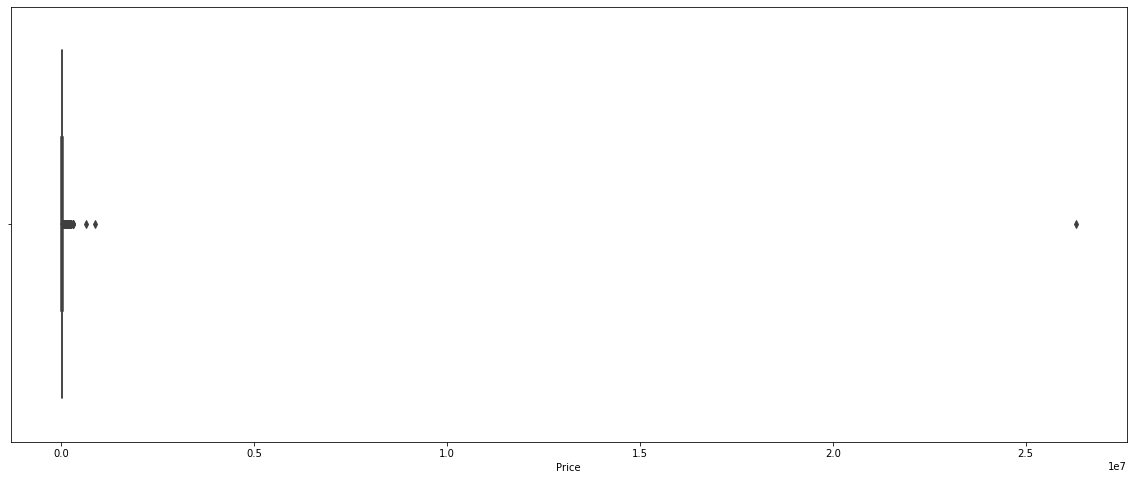

In [144]:
sns.boxplot(df['Price'])

TypeError: ignored

In [115]:
df.duplicated().sum()

313

In [116]:
df.drop_duplicates()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [117]:
df = df.drop(columns='ID')

In [118]:
df['Levy'].replace({"-":np.nan},inplace=True)

In [119]:
df['Mileage'] = df['Mileage'].str.replace('km','')
df['Turbo'] = df['Engine volume'].str.contains("Turbo")
df['Turbo'] = df['Turbo'].map({False:0,True:1})
df['Engine volume'] = df['Engine volume'].str.split().str[0]
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,0
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,0
2,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,0
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,NaN,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,1
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,0
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365,4.0,Automatic,Front,04-May,Left wheel,Grey,4,0
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258,4.0,Automatic,Front,04-May,Left wheel,Black,4,0


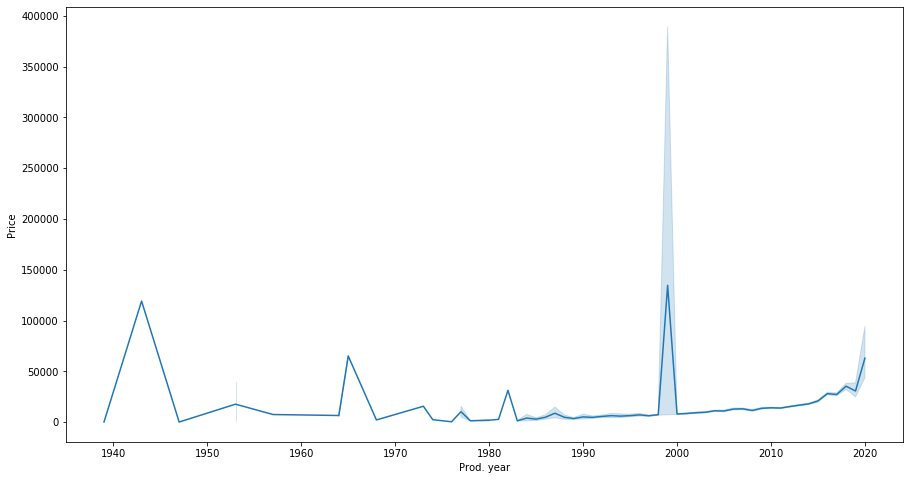

In [10]:
plt.figure(figsize=(15,8))
sns.lineplot(x= df['Prod. year'],y = df['Price']) # 연도별 Pirce 그래프. 이상치가 섞여있는것 같으며 큰 특이점은 없었다.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


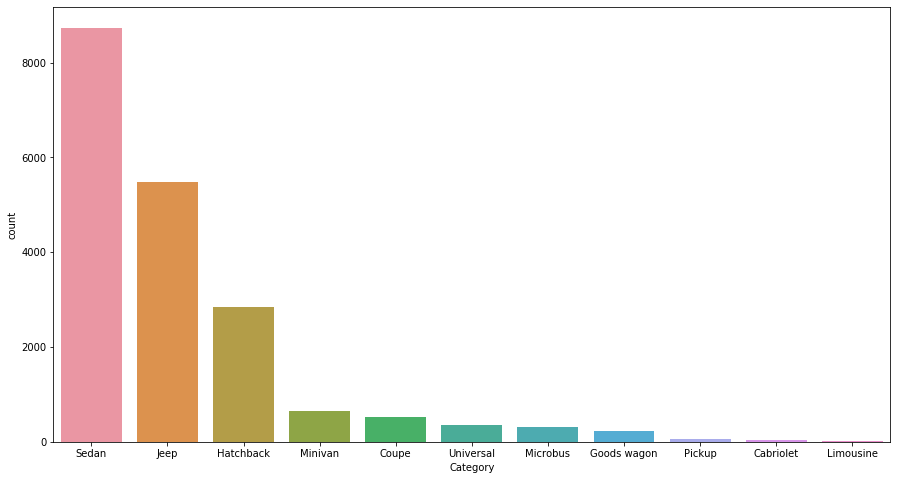

In [11]:
plt.figure(figsize=(15,8));
sns.countplot(df['Category'], order = df['Category'].value_counts().index); # Top3의 물량이 나머지를 압도함. 그중 세단의 인기가 가장 좋음을 알 수 있다.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


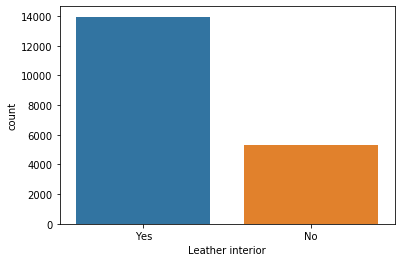

In [12]:
sns.countplot(df['Leather interior']) # 가죽 인테리어를 한 차량이 많다. 1

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


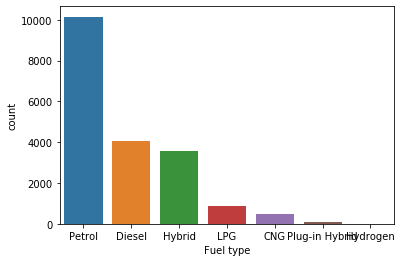

In [13]:
sns.countplot(df['Fuel type'], order=df['Fuel type'].value_counts().index); # 가솔린 차량이 압도적으로 많다. 디젤과 하이브리드는 비슷

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


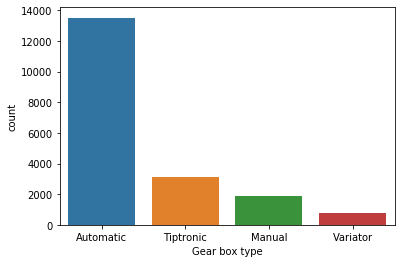

In [14]:
sns.countplot(df['Gear box type'], order=df['Gear box type'].value_counts().index);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


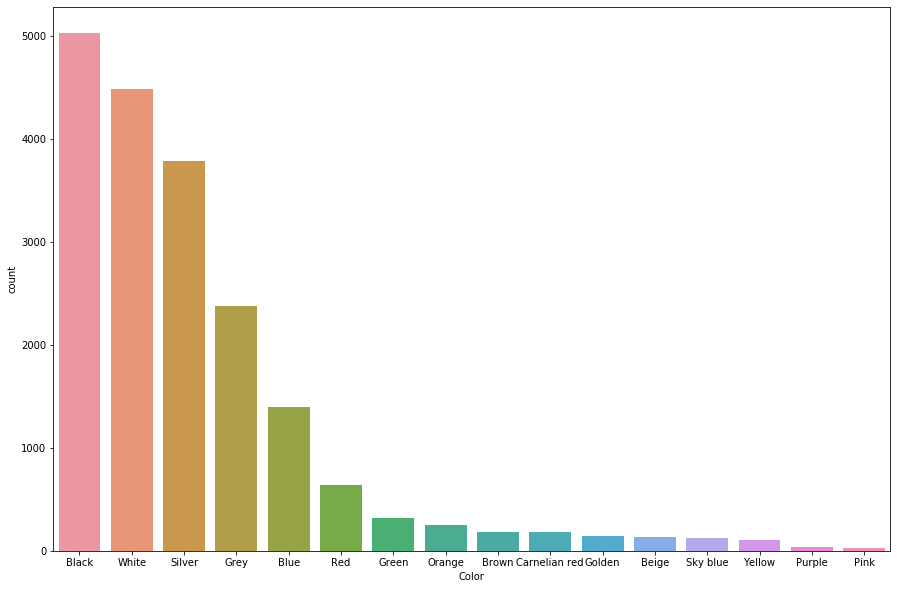

In [15]:
plt.figure(figsize=(15,10))
sns.countplot(df['Color'], order=df['Color'].value_counts().index);

In [120]:
df['Leather interior'] = df['Leather interior'].map({'Yes':1, 'No':0})

In [121]:
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,0
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,0
2,8467,NaN,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,0
3,3607,862,FORD,Escape,2011,Jeep,1,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,0
4,11726,446,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,NaN,MERCEDES-BENZ,CLK 200,1999,Coupe,1,CNG,2.0,300000,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,1
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,1,Petrol,2.4,161600,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,0
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,1,Diesel,2,116365,4.0,Automatic,Front,04-May,Left wheel,Grey,4,0
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,1,Diesel,2,51258,4.0,Automatic,Front,04-May,Left wheel,Black,4,0


In [122]:
impute = KNNImputer(n_neighbors=5)
df['Levy'] = impute.fit_transform(df['Levy'].values.reshape(-1,1))

In [123]:
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399.000000,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,0
1,16621,1018.000000,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,0
2,8467,906.838128,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,0
3,3607,862.000000,FORD,Escape,2011,Jeep,1,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,0
4,11726,446.000000,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,906.838128,MERCEDES-BENZ,CLK 200,1999,Coupe,1,CNG,2.0,300000,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,1
19233,15681,831.000000,HYUNDAI,Sonata,2011,Sedan,1,Petrol,2.4,161600,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,0
19234,26108,836.000000,HYUNDAI,Tucson,2010,Jeep,1,Diesel,2,116365,4.0,Automatic,Front,04-May,Left wheel,Grey,4,0
19235,5331,1288.000000,CHEVROLET,Captiva,2007,Jeep,1,Diesel,2,51258,4.0,Automatic,Front,04-May,Left wheel,Black,4,0


In [124]:
df['Doors'] = df['Doors'].map({'04-May':'4-5', '02-Mar': '2-3'})
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399.000000,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,6.0,Automatic,4x4,4-5,Left wheel,Silver,12,0
1,16621,1018.000000,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3,192000,6.0,Tiptronic,4x4,4-5,Left wheel,Black,8,0
2,8467,906.838128,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000,4.0,Variator,Front,4-5,Right-hand drive,Black,2,0
3,3607,862.000000,FORD,Escape,2011,Jeep,1,Hybrid,2.5,168966,4.0,Automatic,4x4,4-5,Left wheel,White,0,0
4,11726,446.000000,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,91901,4.0,Automatic,Front,4-5,Left wheel,Silver,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,906.838128,MERCEDES-BENZ,CLK 200,1999,Coupe,1,CNG,2.0,300000,4.0,Manual,Rear,2-3,Left wheel,Silver,5,1
19233,15681,831.000000,HYUNDAI,Sonata,2011,Sedan,1,Petrol,2.4,161600,4.0,Tiptronic,Front,4-5,Left wheel,Red,8,0
19234,26108,836.000000,HYUNDAI,Tucson,2010,Jeep,1,Diesel,2,116365,4.0,Automatic,Front,4-5,Left wheel,Grey,4,0
19235,5331,1288.000000,CHEVROLET,Captiva,2007,Jeep,1,Diesel,2,51258,4.0,Automatic,Front,4-5,Left wheel,Black,4,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  float64
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  int64  
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  object 
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19109 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

In [125]:
df['Mileage'] = df['Mileage'].astype(int)

In [126]:
def handling_outliers(data, columns):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        for i in range(df.shape[0]):
            if data[col][i] < lower_bound:
                data[col][i] = lower_bound
            elif data[col][i] > upper_bound:
                data[col][i] = upper_bound
            else:
                continue
    return data

In [127]:
def get_continus_columns(data):
    obj = list(data.select_dtypes('object').columns)
    lst = list(data.columns)
    for col in obj:
        lst.remove(col)
    return lst

In [128]:
get_continus_columns(df)

['Price',
 'Levy',
 'Prod. year',
 'Leather interior',
 'Mileage',
 'Cylinders',
 'Airbags',
 'Turbo']

In [129]:
df = handling_outliers(df, get_continus_columns(df))

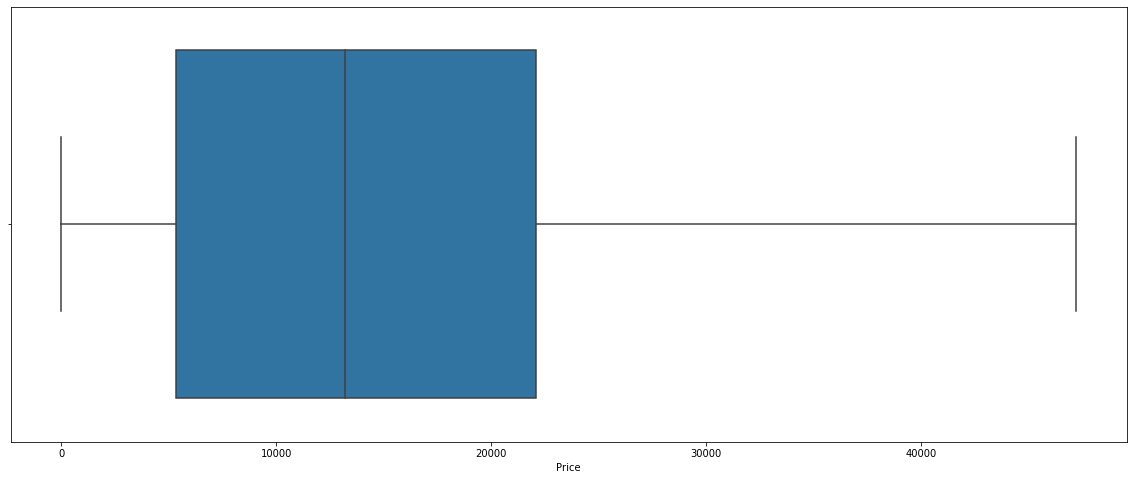

In [130]:
sns.boxplot(df['Price'])

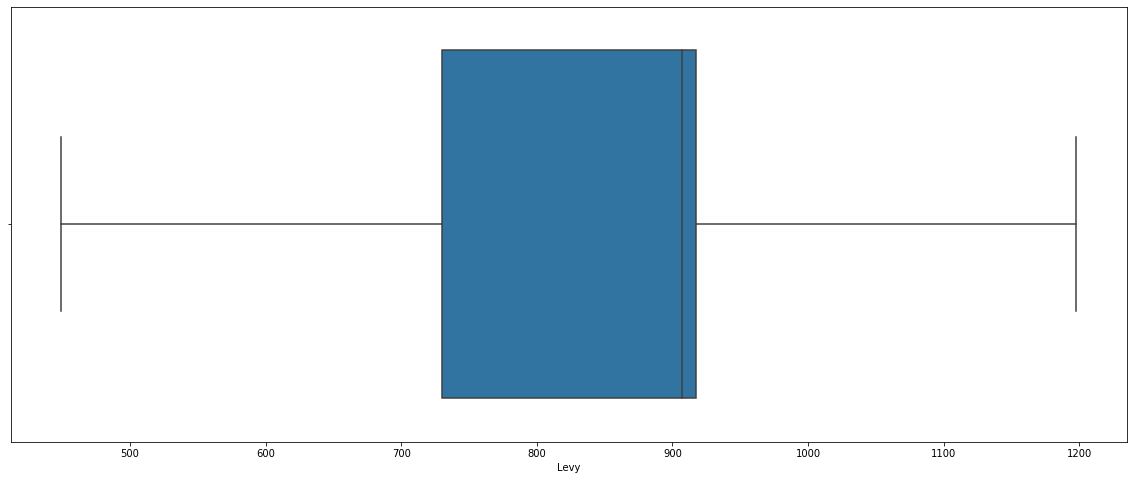

In [131]:
sns.boxplot(df['Levy'])

In [132]:
df_copy = df.copy()

In [133]:
 for col in df.select_dtypes('object').columns:
     le = LabelEncoder()
     df[col] = le.fit_transform(df[col])

In [134]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1197.500000,32,1242,2010,4,1,2,39,186005,4.0,0,0,1,0,12,12,0
1,16621,1018.000000,8,658,2011,4,0,5,33,192000,4.0,2,0,1,0,1,8,0
2,8467,906.838128,21,684,2006,3,0,5,14,200000,4.0,3,1,1,1,1,2,0
3,3607,862.000000,16,661,2011,4,1,2,27,168966,4.0,0,0,1,0,14,0,0
4,11726,449.500000,21,684,2014,3,1,5,14,91901,4.0,0,1,1,0,12,4,0


In [96]:
x = df.drop(['Price', 'Color'], axis=1).values
y = df['Price'].values

In [97]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)

In [89]:
lr  = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=8)
dt  = DecisionTreeRegressor(max_depth = 5)
rf  = RandomForestRegressor(n_estimators=100, max_features= 7)
ada = AdaBoostRegressor( n_estimators=150, learning_rate =.08)
gbr = GradientBoostingRegressor(max_depth=7, n_estimators=500, learning_rate =.05)
xgb = XGBRegressor(max_depth = 7, n_estimators=500, learning_rate =.05)

regressors = [('Linear Regression', lr), ('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf), 
              ('AdaBoost', ada),('Gradient Boosting Regressor', gbr),('XGBRegressor', xgb)]

Linear Regression : 25 %
K Nearest Neighbours : 18 %
Decision Tree : 44 %
Random Forest : 79 %
AdaBoost : 37 %
Gradient Boosting Regressor : 79 %
[01:03:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor : 78 %


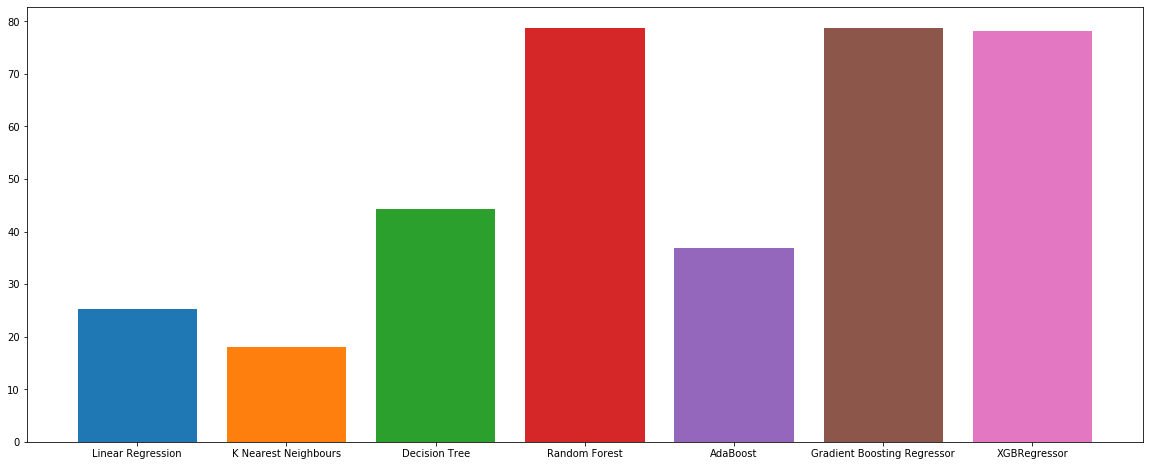

In [98]:
for regressor_name, regressor in regressors:

    regressor.fit(X_train, y_train)    
  
    y_pred = regressor.predict(X_test)
    accuracy = round(r2_score(y_test,y_pred),3)*100
    
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy));
    plt.rcParams["figure.figsize"] = (20,8);
    plt.bar(regressor_name,accuracy);

In [99]:
target = 'Price'
feature = df.drop(columns=[target,'Color']).columns
train, test = train_test_split(df, test_size=0.2, random_state=2)
X_train = train[feature]
y_train = train[target]
X_test = test[feature]
y_test = test[target]

In [52]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

In [100]:
pipe = make_pipeline(
    MinMaxScaler(), 
    RandomForestRegressor()
)

dists = {
    'randomforestregressor__n_estimators': randint(50, 500), 
    'randomforestregressor__max_depth': [5, 10, 15, 20, None], 
    'randomforestregressor__max_features': uniform(0, 1) # max_features
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=10, 
    cv=10, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [101]:
pipe = clf.best_estimator_

In [102]:
pipe

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_features=0.6717914062172816,
                                       n_estimators=172))])

In [103]:
y_pred = pipe.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트세트 MAE: ${mae:,.0f}')

테스트세트 MAE: $3,454


In [62]:
mean = df['Price'].mean()

In [63]:
error = mean - df['Price']
error

0         2546.8532
1         -746.1468
2         7407.8532
3        12267.8532
4         4148.8532
            ...    
19232     7407.8532
19233      193.8532
19234   -10233.1468
19235    10543.8532
19236    15404.8532
Name: Price, Length: 19237, dtype: float64

In [146]:
mae_1 = error.abs().mean()
print(f'기준모델 MAE: ${mae_1:,.0f}')

기준모델 MAE: $10,636


In [ ]:
pipe.score(X_train, y_train)

In [104]:
pipe.score(X_test, y_test)

0.7903906271417319

In [105]:
r2_score(y_test, y_pred)

0.7903906271417319

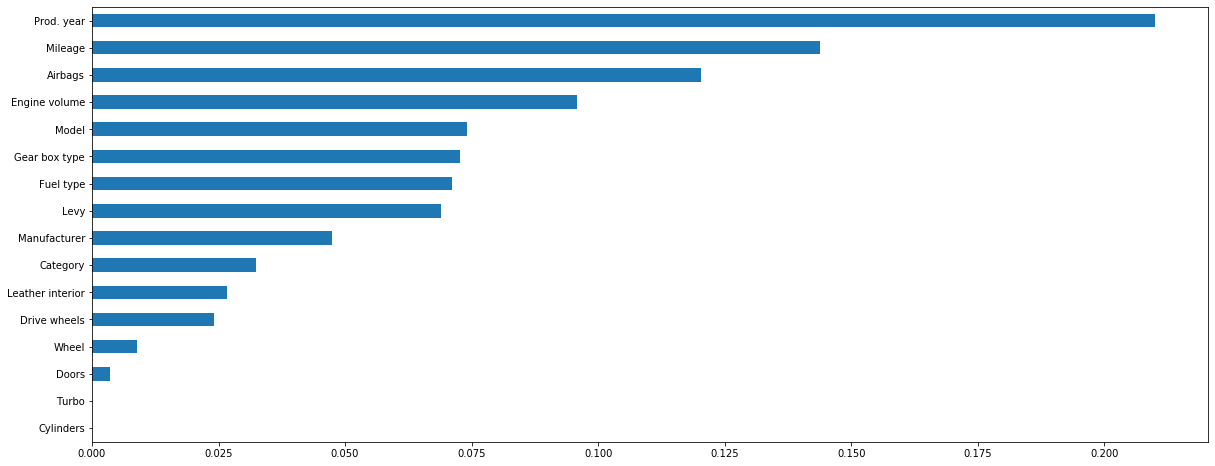

In [80]:
rf = pipe.named_steps['randomforestregressor']
importances_ord = pd.Series(rf.feature_importances_, X_train.columns)
importances_ord.sort_values().plot.barh();

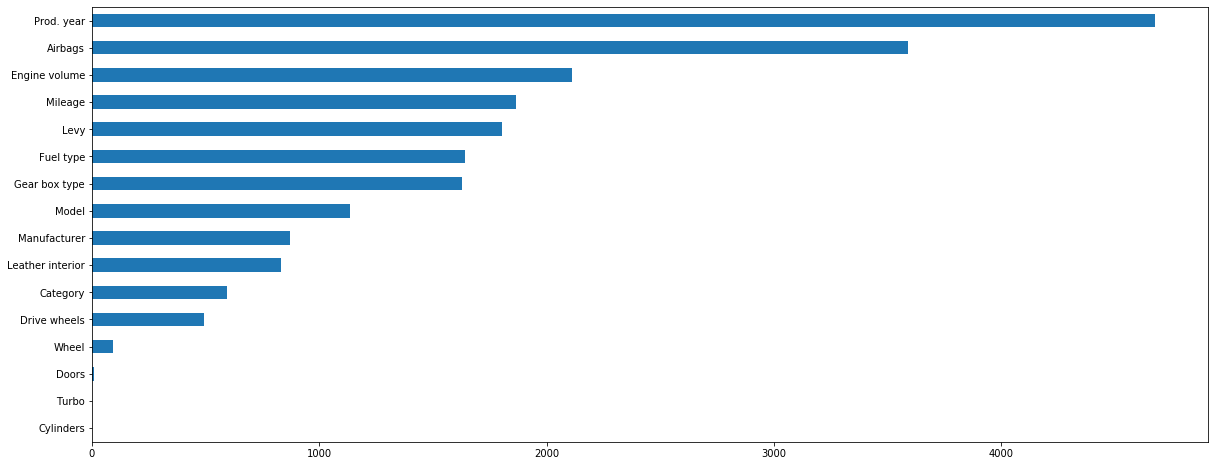

In [81]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    pipe,
    scoring='neg_mean_absolute_error',
    n_iter=3,
    random_state=1)

# permutation importance 계산
permuter.fit(X_test_copy, y_test_copy)

# 결과 확인
feature_names = list(X_test.columns)
per = pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)
per.sort_values().plot.barh();

In [71]:
!pip install pdpbox
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [85]:
from pdpbox.pdp import pdp_isolate, pdp_plot

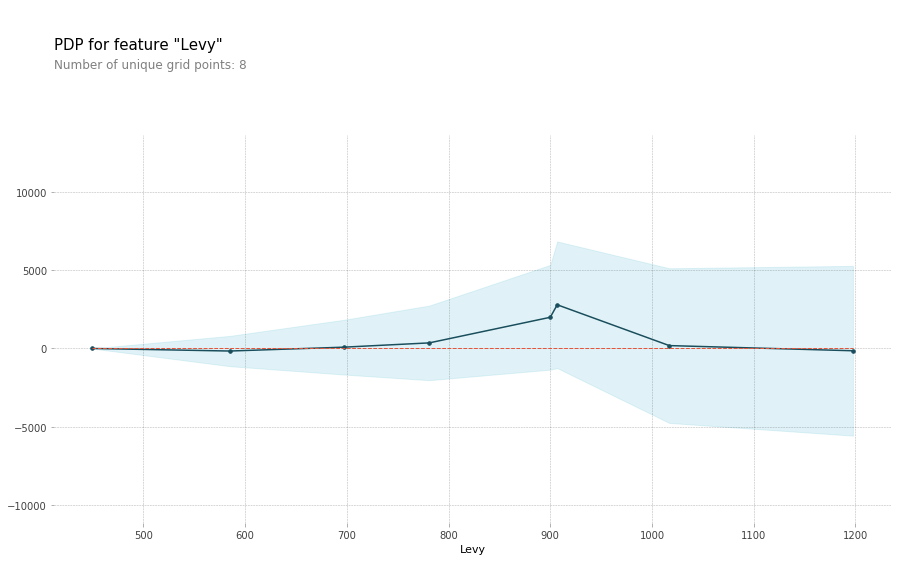

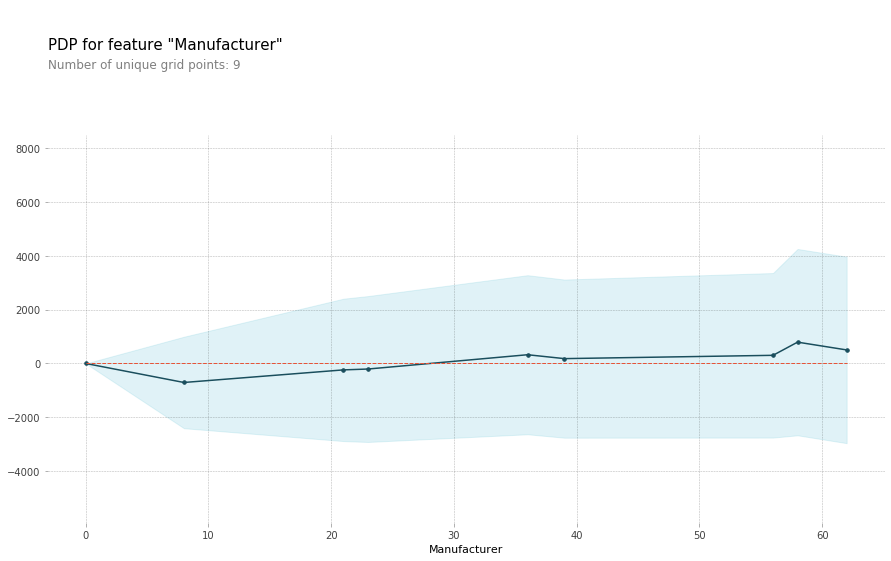

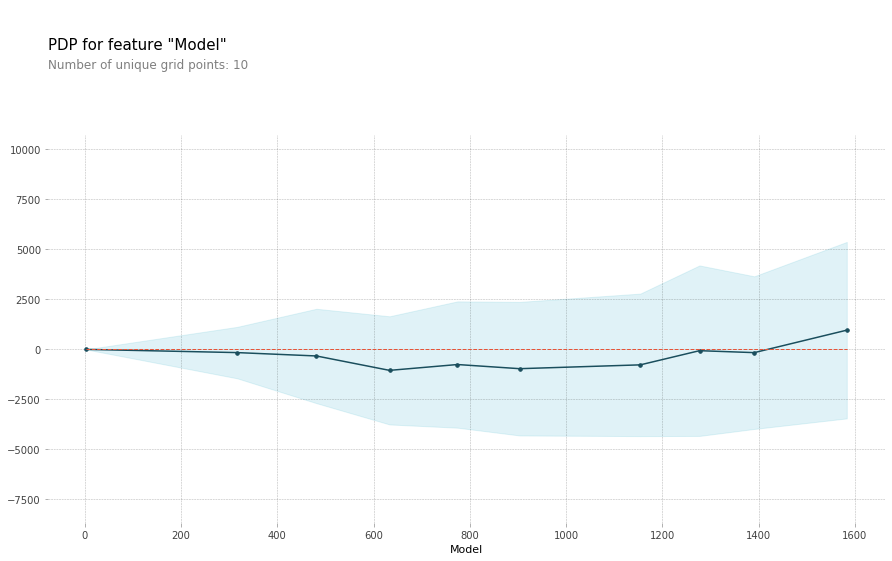

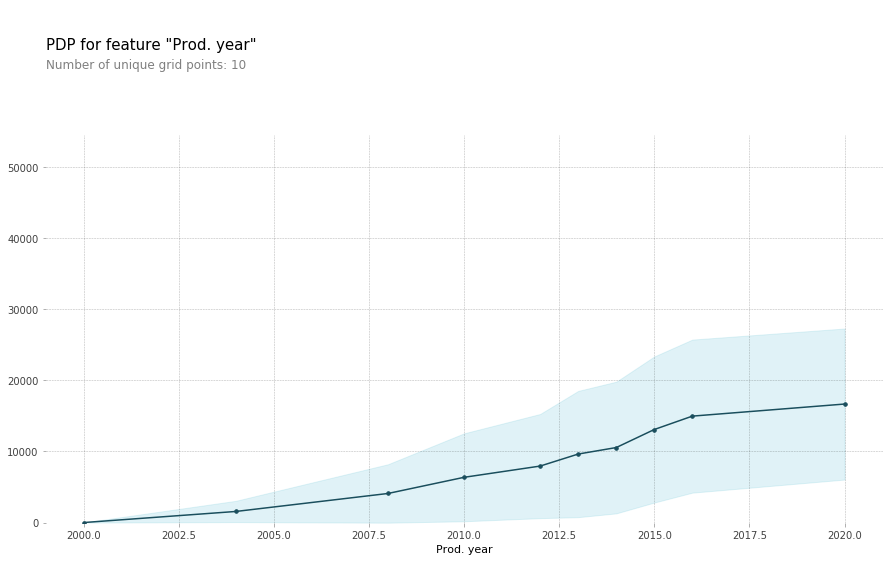

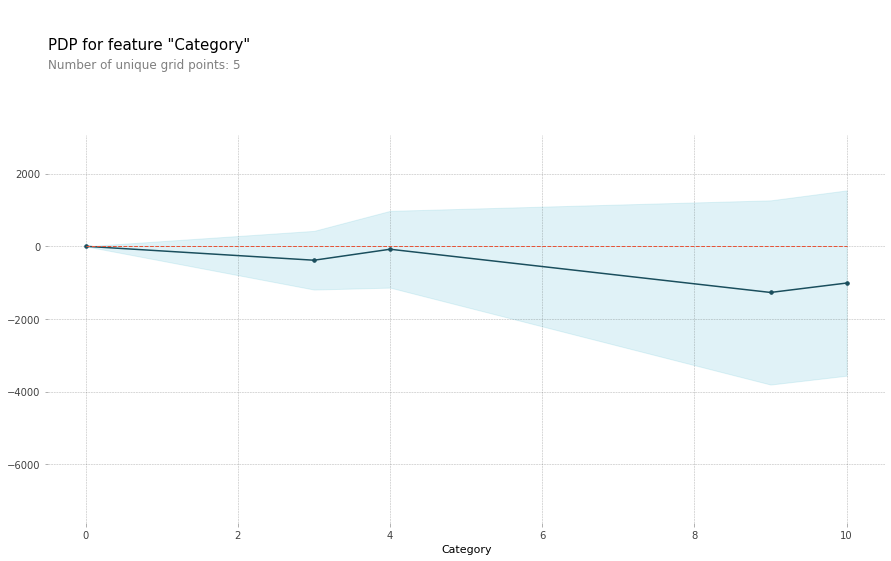

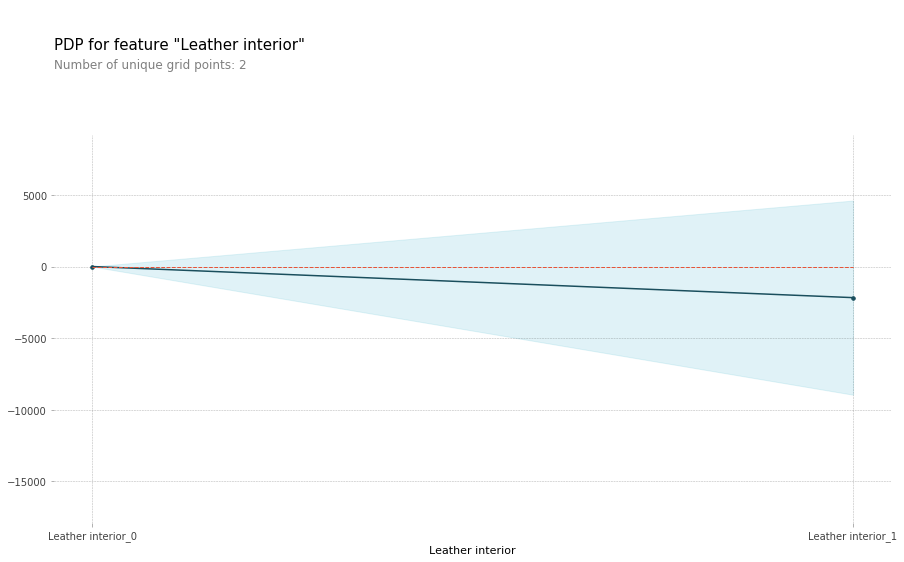

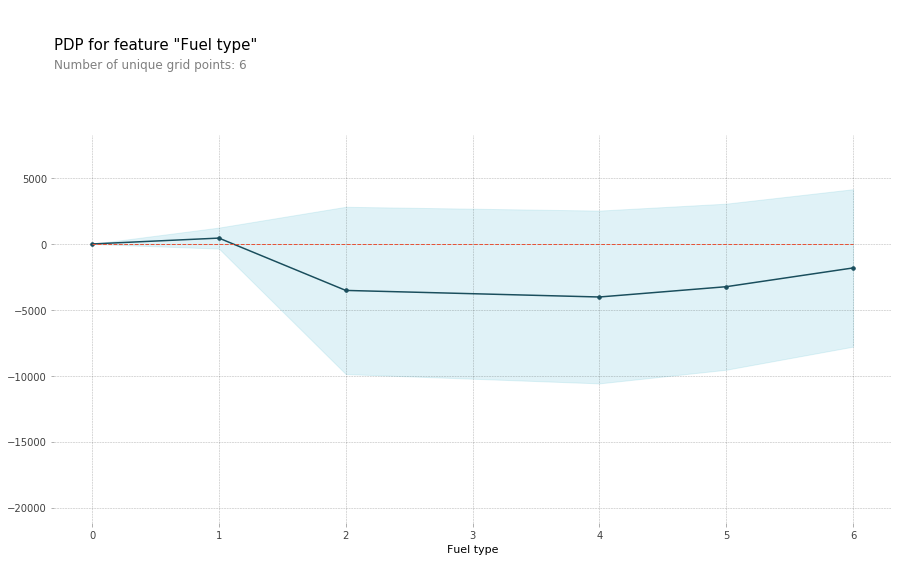

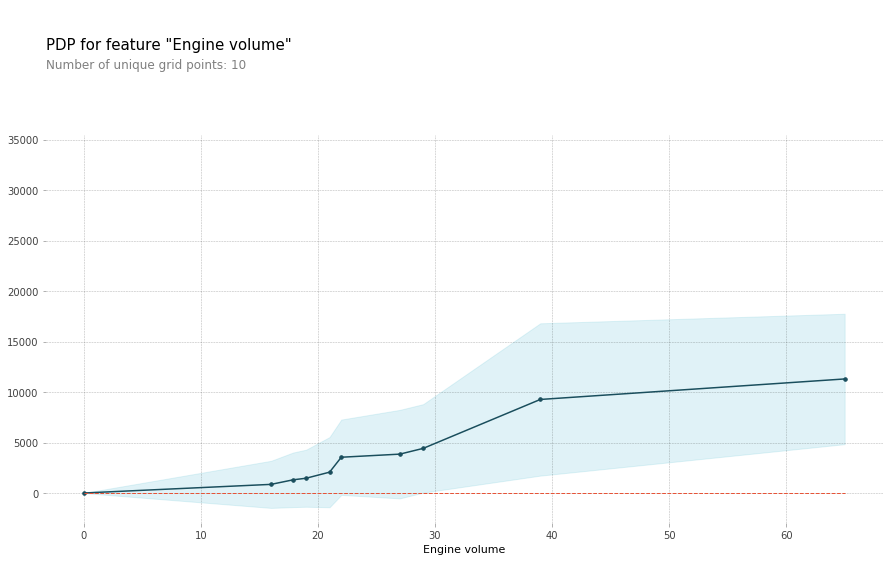

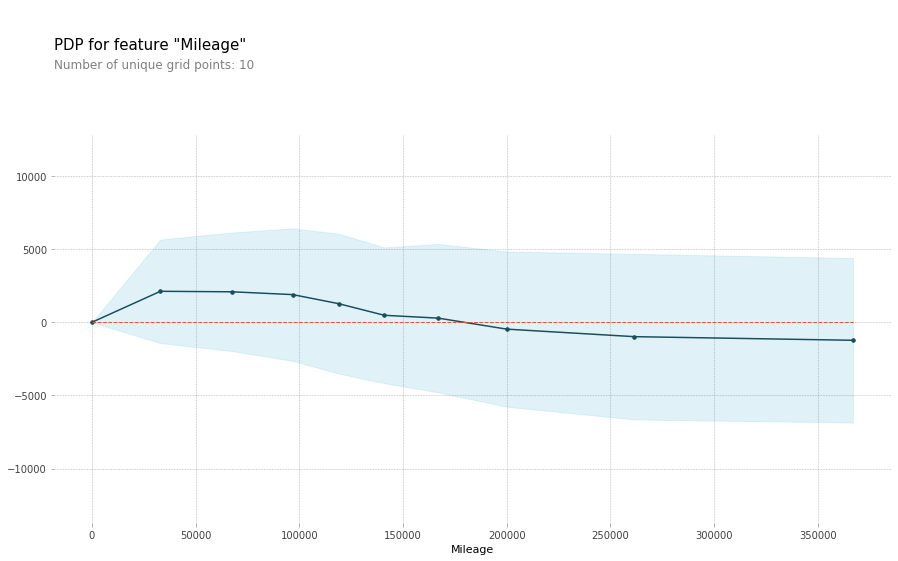

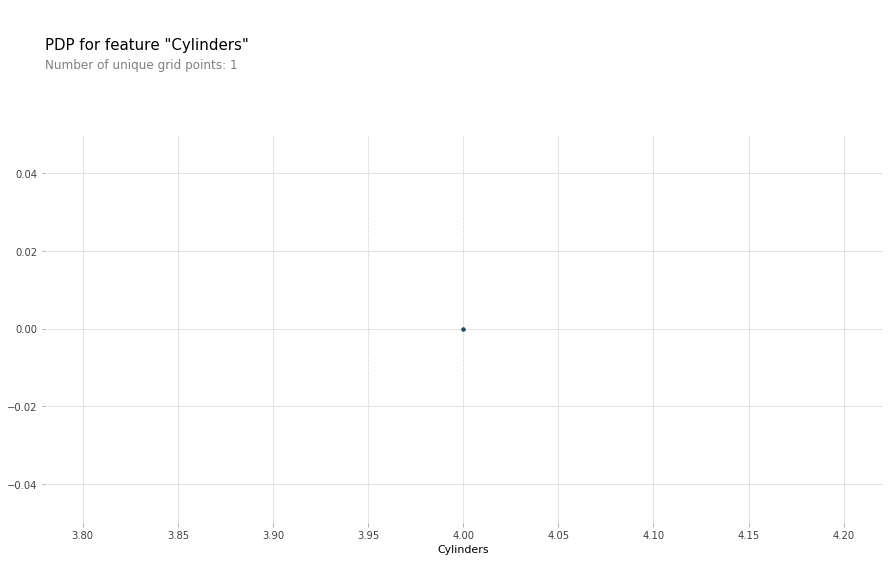

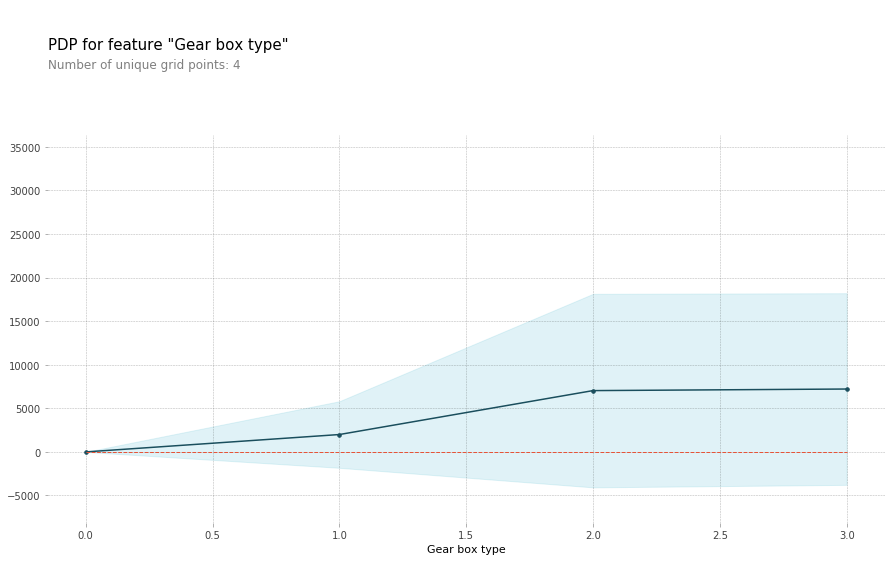

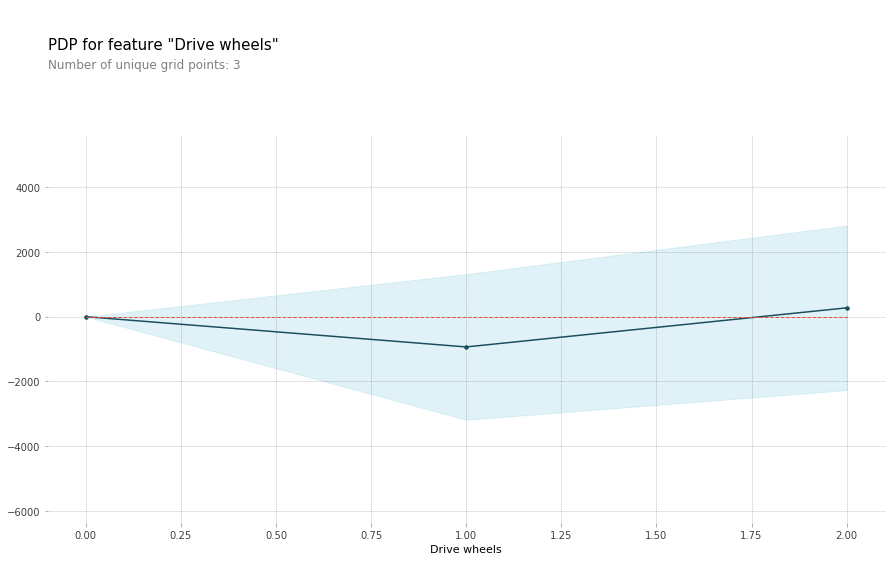

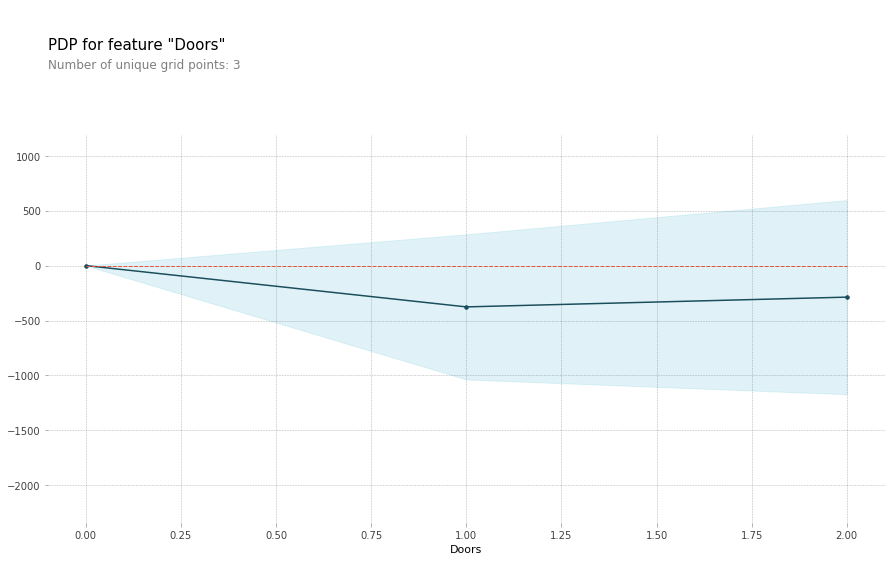

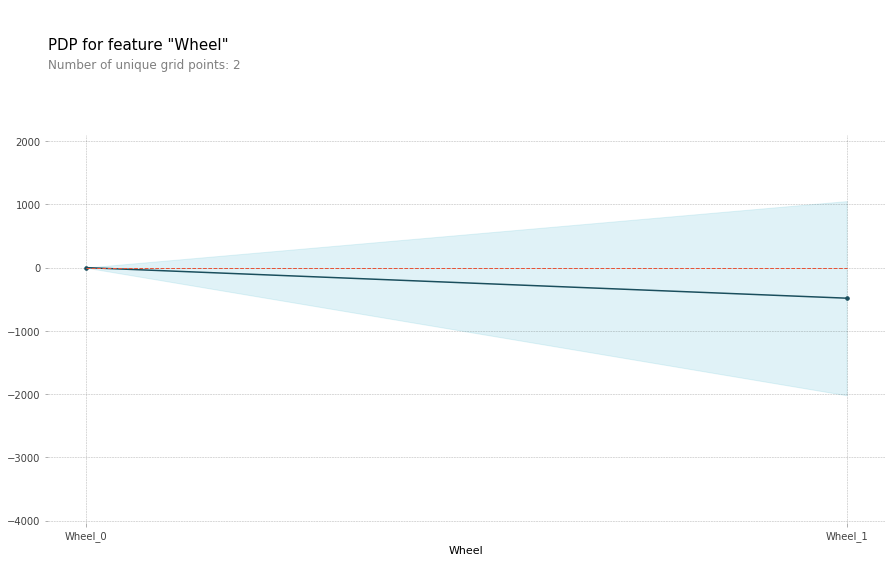

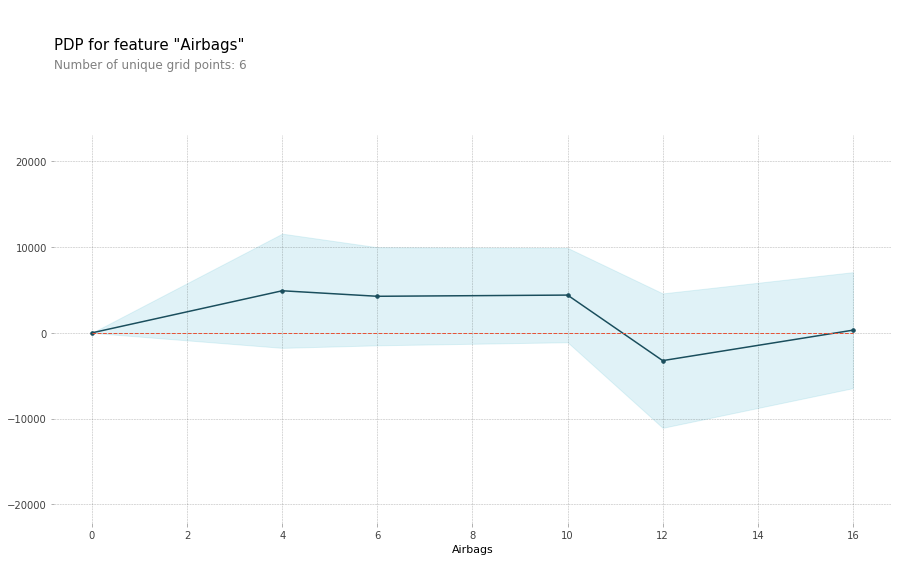

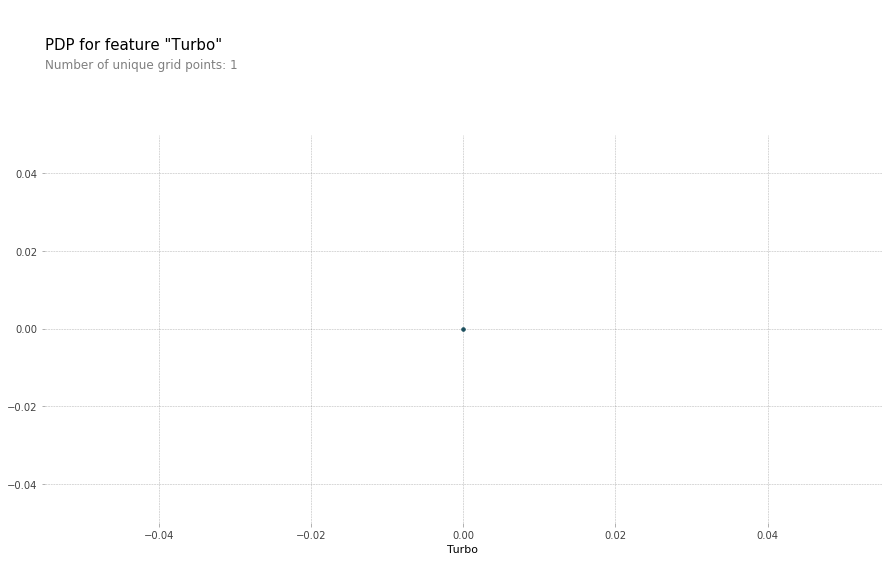

In [106]:
for col in list(X_test.columns):
  isolated = pdp_isolate(
    model=pipe, 
    dataset=X_test, 
    model_features=X_test.columns, 
    feature=col,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
    )
  pdp_plot(isolated, feature_name=col);